In [230]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import  datasets
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [231]:
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [233]:
df.shape

(600, 6)

In [234]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [235]:
###creating dummy variable

In [236]:
df=pd.get_dummies(df,columns=['Urban','Marital.Status','Undergrad'], drop_first=True)
df

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Marital.Status_Married,Marital.Status_Single,Undergrad_YES
0,68833,50047,10,1,0,1,0
1,33700,134075,18,1,0,0,1
2,36925,160205,30,1,1,0,0
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,1,0,0,0
598,98592,180083,17,0,1,0,1


In [237]:
###creating new cols taxinc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for risky and good
df['Taxinc']=pd.cut(df['Taxable.Income'],bins=[10002,30000,99620],labels=['Risky','Good'])

In [238]:
df

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Marital.Status_Married,Marital.Status_Single,Undergrad_YES,Taxinc
0,68833,50047,10,1,0,1,0,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,1,1,0,0,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,1,0,0,0,Good
598,98592,180083,17,0,1,0,1,Good


In [239]:
###taxable income<=30000 as 'risky' others 'good'=1

In [240]:
##taxinc also made dummies and concating
df=pd.get_dummies(df,columns=['Taxinc'],drop_first=True)


In [241]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Marital.Status_Married,Marital.Status_Single,Undergrad_YES,Taxinc_Good
0,68833,50047,10,1,0,1,0,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,1,1,0,0,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


In [242]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [243]:
# Normalized data frame 
df_norm = norm_func(df.iloc[:,1:])
df_norm.head()

,City.Population,Work.Experience,Urban_YES,Marital.Status_Married,Marital.Status_Single,Undergrad_YES,Taxinc_Good
0,0.139472,0.333333,1.0,0.0,1.0,0.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,1.0,1.0,0.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0


In [244]:
x=df_norm.drop(['Taxinc_Good'],axis=1)
y=df_norm['Taxinc_Good']

In [245]:
###spliting data into training and test dataset

In [246]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [247]:
##converting the taxable income variable 

In [248]:
##Converting the Taxable income variable to bucketing. 
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [249]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [250]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)


In [251]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [252]:
##Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [253]:
###building decision tree classifier using entropy criteria

In [254]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [255]:
###plot fig

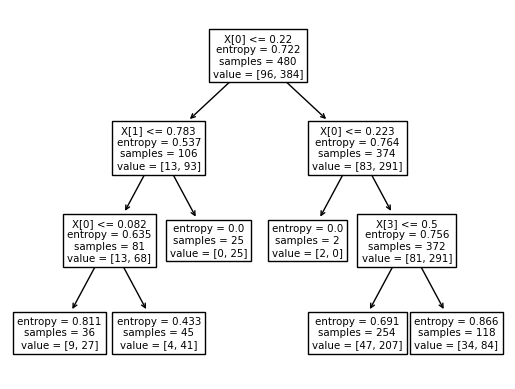

In [256]:
plt.figure(dpi=100)
tree.plot_tree(model);

In [257]:
colnames=list(df.columns)
colnames

['population',
 'experience',
 'Urban_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Undergrad_YES',
 'Taxinc_Good']

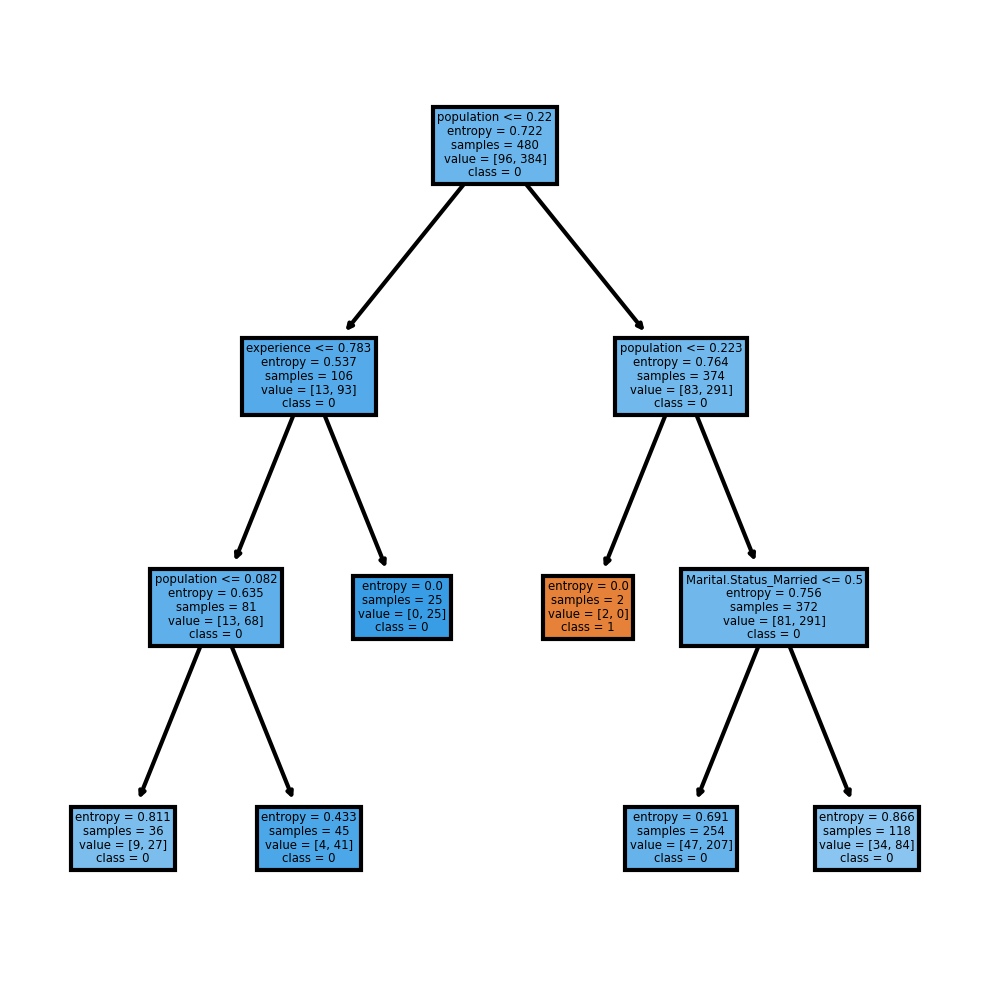

In [258]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [259]:
###predicting on test data

In [260]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1.0    120
dtype: int64

In [261]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [262]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        28
         1.0       0.77      1.00      0.87        92

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



In [263]:
###accuracy

In [264]:
np.mean(preds==y_test)

0.7666666666666667

In [265]:
####building decision tree classifier(CART) using gini criteria

In [266]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [267]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [268]:
###prediction and computing the accuracy

In [269]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667

In [270]:
####decision tree example

In [271]:
from sklearn.tree import DecisionTreeRegressor

In [272]:
array=df.values
x = array[:,0:3]
y = array[:,3]

In [273]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [274]:
model= DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [275]:
model.score(x_test,y_test)

-1.147154850746269